## Help your hedge fund manager!

You have two datasets at your disposal: `Balance_Sheet.xlsx` and `Income_Statement.xlsx`. Both these datasets have three columns in common:
- `"Company"`: The company's ticker name.
- `"comp_type"` The type of industry the company in question belongs to. It is either `"tech"` for companies in the technology industry, `"fmcg"` for companies in the fast-moving consumer goods industry, and `"real_est"` for companies in the real estate industry. 
- `"Year"`: The year the company's information is from.

The rest of the columns in the datasets contain information from the financial statement of the `"Company"` in question. Note that the columns in `Balance_Sheet.xlsx` only contain financial information from the balance sheet. Similarly, the columns in `Income_Statement.xlsx` only contain financial information from the income statement. The columns are named accordingly. For instance, the column `"Total Liab"` from `Balance_Sheet.xlsx` is the total liability.

To successfully complete the project for your manager, please compute two ratios:

- A debt-to-equity ratio or an equity multiplier ratio. Save this ratio in a column named `"leverage_ratio"` in a DataFrame called `df_ratios`.

- A gross margin ratio or an operating margin ratio. Save this ratio in a column named `"profitability_ratio"`, in a DataFrame called `df_ratios`.

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns

pd.set_option("display.width", 1000)

df_balance_sheet = pd.read_excel("data/Balance_Sheet.xlsx")
df_income_statement = pd.read_excel("data/Income_Statement.xlsx")

In [10]:
print(df_balance_sheet.columns, "\n")
print(df_income_statement.columns)

Index(['Unnamed: 0', 'Year', 'comp_type', 'company', 'Accounts Payable',
       'Cash', 'Inventory', 'Property Plant Equipment',
       'Short Term Investments', 'Total Assets', 'Total Current Assets',
       'Total Current Liabilities', 'Total Liab', 'Total Stockholder Equity'],
      dtype='object') 

Index(['Unnamed: 0', 'Year', 'comp_type', 'company', 'Cost Of Goods Sold',
       'Gross Profit', 'Operating Income', 'Total Operating Expenses',
       'Total Revenue'],
      dtype='object')


In [14]:
df_ratios = pd.merge(df_income_statement, df_balance_sheet, on=["comp_type", "company", "Year"])

print(df_ratios.head())

   Unnamed: 0_x  Year comp_type company  Cost Of Goods Sold  Gross Profit  Operating Income  Total Operating Expenses  Total Revenue  Unnamed: 0_y  Accounts Payable         Cash     Inventory  Property Plant Equipment  Short Term Investments  Total Assets  Total Current Assets  Total Current Liabilities    Total Liab  Total Stockholder Equity
0             0  2019      tech    AAPL        161782000000   98392000000       63930000000              196244000000   260174000000             0       46236000000  48844000000  4.106000e+09               37378000000            5.171300e+10  338516000000          162819000000               105718000000  248028000000               90488000000
1             1  2020      tech    AAPL        169559000000  104956000000       66288000000              208227000000   274515000000             1       42296000000  38016000000  4.061000e+09               45336000000            5.292700e+10  323888000000          143713000000               105392000000  2585

In [15]:
df_ratios["leverage_ratio"] = df_ratios["Total Liab"] / df_ratios["Total Stockholder Equity"]
df_ratios["profitability_ratio"] = (df_ratios["Total Revenue"] - df_ratios["Total Operating Expenses"])/df_ratios["Total Revenue"]

The datasets provided to you have information on the type of industry a company belongs to in a column called comp_type. Your manager also needs you to answer these three questions:

- Which company type (`comp_type`) has the lowest profitability ratio? Save this `comp_type` value as a string in a variable called `lowest_profitability`.

In [16]:
df_lowest = df_ratios.pivot_table(index="comp_type", values="profitability_ratio")
df_lowest = df_lowest.sort_values(by="profitability_ratio").reset_index()
lowest_profitability = str(df_lowest.head(1)["comp_type"][0])

print(lowest_profitability)
print(type(lowest_profitability))

fmcg
<class 'str'>


- Which company type has the highest leverage ratio? Save this `comp_type` value as a string in a variable called `highest_leverage`.

In [17]:
df_highest = df_ratios.pivot_table(index="comp_type", values="leverage_ratio")
df_highest = df_highest.sort_values(by="leverage_ratio", ascending=False).reset_index()
highest_leverage = str(df_highest.head(1)["comp_type"][0])
print(highest_leverage)
print(type(highest_leverage))

real_est
<class 'str'>


- What is the relationship between leverage and profitability in the real estate companies represented in this data? Is it "positive," "negative," or "no relationship?" Save one of these three strings in a variable called `relationship`.

In [18]:
df_real_est = df_ratios.loc[df_ratios["comp_type"]=="real_est"]
print(df_real_est.head())

    Unnamed: 0_x  Year comp_type company  Cost Of Goods Sold  Gross Profit  Operating Income  Total Operating Expenses  Total Revenue  Unnamed: 0_y  ...     Inventory  Property Plant Equipment  Short Term Investments  Total Assets  Total Current Assets  Total Current Liabilities    Total Liab  Total Stockholder Equity  leverage_ratio  profitability_ratio
20            20  2018  real_est     BAM         45519000000   12970000000        9764000000               48725000000    58489000000            20  ...  6.989000e+09              151936000000                     NaN  256281000000           35980000000                19284000000  159131000000               25647000000        6.204663             0.166937
21            21  2019  real_est     BAM         52728000000   18881000000       13907000000               57702000000    71609000000            21  ...  1.027200e+10              186059000000                     NaN  323969000000           40771000000                27752000000  20712

<Axes: xlabel='leverage_ratio', ylabel='profitability_ratio'>

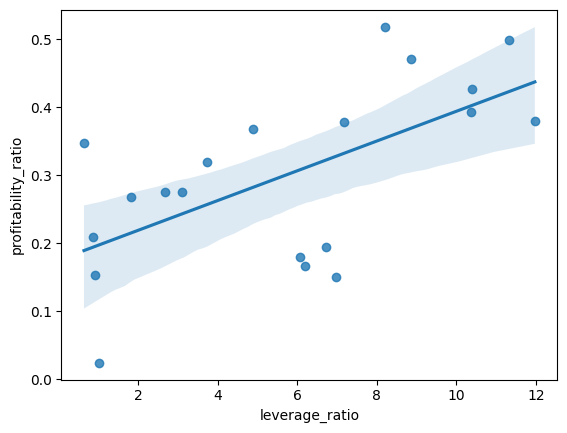

In [19]:
sns.regplot(data=df_real_est, x="leverage_ratio", y="profitability_ratio")

In [20]:
relationship = "positive"
print(relationship)

positive
